In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sinderpreet/customer-segmentation-and-clustering-python")

print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 374kB/s]

Extracting files...
Path to dataset files: C:\Users\sandeem\.cache\kagglehub\datasets\sinderpreet\customer-segmentation-and-clustering-python\versions\1
Path to dataset files: C:\Users\sandeem\.cache\kagglehub\datasets\sinderpreet\customer-segmentation-and-clustering-python\versions\1


In [5]:
import pandas as pd
import os

# Load the CSV file into a DataFrame
csv_file = r"C:\Users\sandeem\.cache\kagglehub\datasets\sinderpreet\customer-segmentation-and-clustering-python\versions\1\Mall_Customers.csv"
df = pd.read_csv(csv_file)

print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Data loaded successfully!
Shape: (200, 5)
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Customer Segmentation Using Clustering

This project demonstrates how clustering algorithms can be used to segment customers based on their characteristics and spending behavior. We'll explore the data, apply different clustering techniques, and interpret the results for business insights.

## 1. Data Exploration and Preprocessing

Let's start by exploring our customer data to understand the distributions and relationships between variables.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Basic data info
print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.7

### Data Overview Analysis

**Key Points for Presentation:**
- **Dataset size**: 200 customers with 5 attributes
- **Data quality**: No missing values (clean dataset)
- **Variable types**: Mix of categorical (Gender) and numerical (Age, Income, Spending Score)
- **Age range**: 18-70 years (diverse customer base)
- **Income range**: $15k-$137k (wide economic spectrum)
- **Spending Score**: 1-99 scale (behavioral measure)

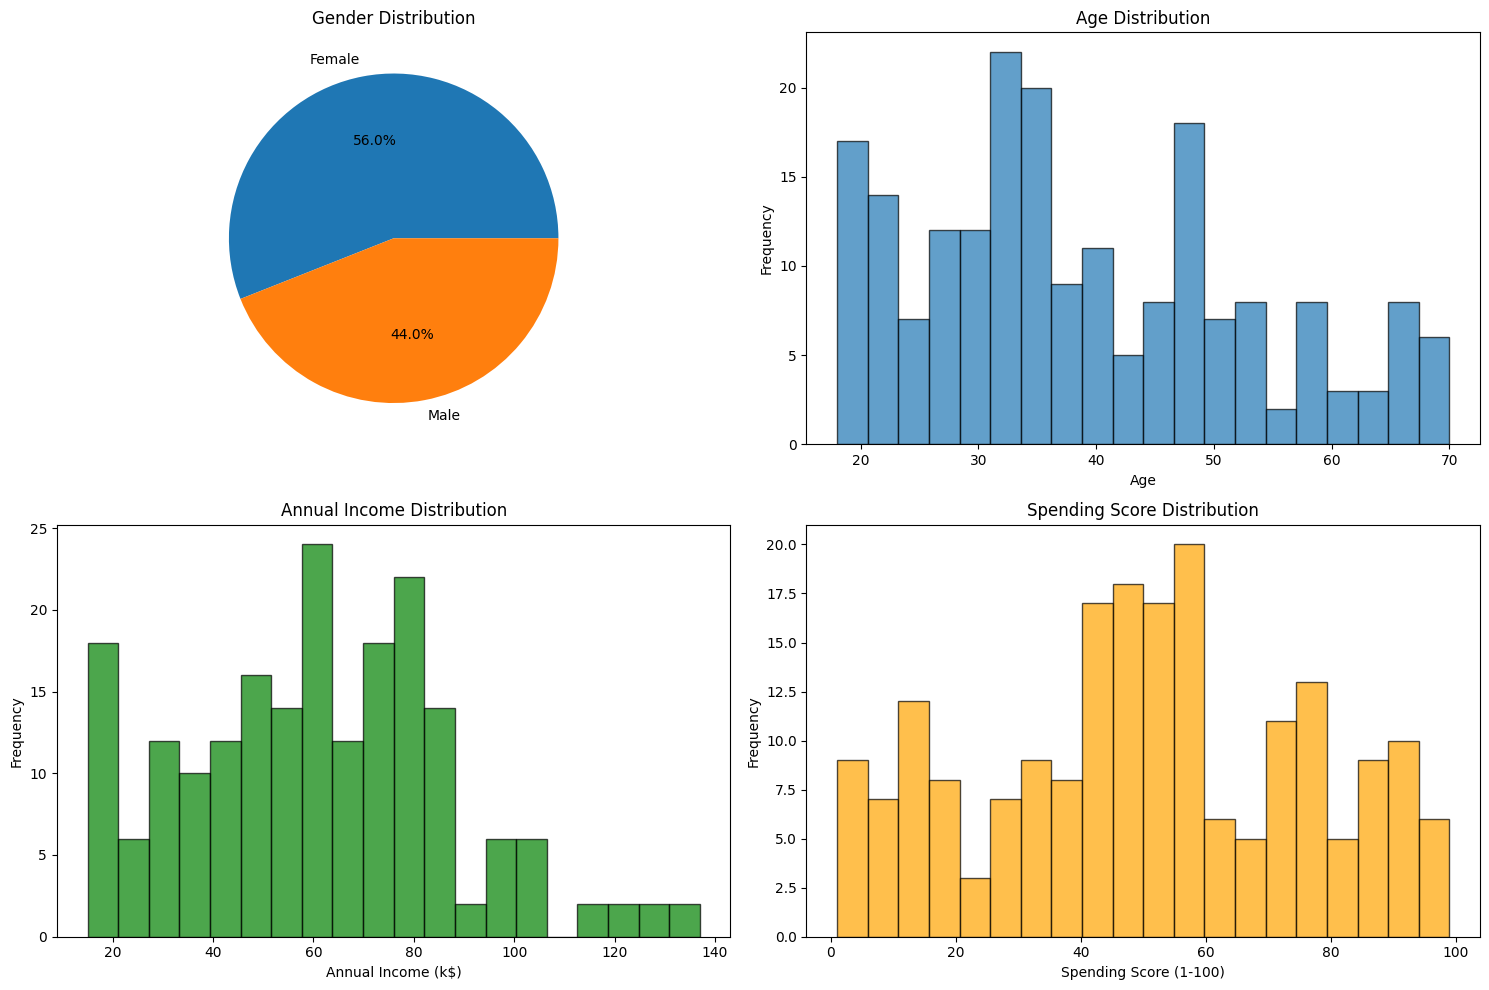

In [7]:
# Visualize data distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender distribution
axes[0,0].pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
axes[0,0].set_title('Gender Distribution')

# Age distribution
axes[0,1].hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Age Distribution')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Frequency')

# Annual Income distribution
axes[1,0].hist(df['Annual Income (k$)'], bins=20, edgecolor='black', alpha=0.7, color='green')
axes[1,0].set_title('Annual Income Distribution')
axes[1,0].set_xlabel('Annual Income (k$)')
axes[1,0].set_ylabel('Frequency')

# Spending Score distribution
axes[1,1].hist(df['Spending Score (1-100)'], bins=20, edgecolor='black', alpha=0.7, color='orange')
axes[1,1].set_title('Spending Score Distribution')
axes[1,1].set_xlabel('Spending Score (1-100)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Data Preprocessing for Clustering

We'll prepare the data for clustering by selecting relevant features and scaling them appropriately.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Drop CustomerID as it's not useful for clustering
df_clean = df.drop('CustomerID', axis=1)

# Encode Gender variable
le = LabelEncoder()
df_clean['Gender_encoded'] = le.fit_transform(df_clean['Gender'])

# Select features for clustering
# We'll use Age, Annual Income, and Spending Score as main features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_clean[features]

print("Features selected for clustering:")
print(features)
print("\nFeature data shape:", X.shape)
print("\nFirst few rows:")
print(X.head())

Features selected for clustering:
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Feature data shape: (200, 3)

First few rows:
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


###  Feature Engineering Notes

**Preprocessing Decisions Explained:**
- **Dropped CustomerID**: Unique identifier, no predictive value
- **Encoded Gender**: Converted to numerical for algorithm compatibility
- **Selected 3 key features**: Age, Income, Spending Score
- **Why these features?**: Represent customer demographics and behavior
- **Business Logic**: These variables directly impact purchasing decisions

In [10]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data scaled successfully!")
print("Scaled data shape:", X_scaled.shape)
print("Mean of scaled features:", np.mean(X_scaled, axis=0))
print("Std of scaled features:", np.std(X_scaled, axis=0))

Data scaled successfully!
Scaled data shape: (200, 3)
Mean of scaled features: [-1.02140518e-16 -2.13162821e-16 -1.46549439e-16]
Std of scaled features: [1. 1. 1.]


###  Feature Scaling Importance

**Why Scaling is Critical:**
- **Different scales**: Age (18-70), Income (15k-137k), Spending (1-99)
- **Algorithm sensitivity**: K-Means uses Euclidean distance
- **Without scaling**: Income would dominate due to larger values
- **After scaling**: Mean = 0, Standard deviation = 1 for all features
- **Result**: Equal weight to all features in clustering

## 3. K-Means Clustering

Let's apply K-Means clustering to segment our customers. First, we'll find the optimal number of clusters using the elbow method.

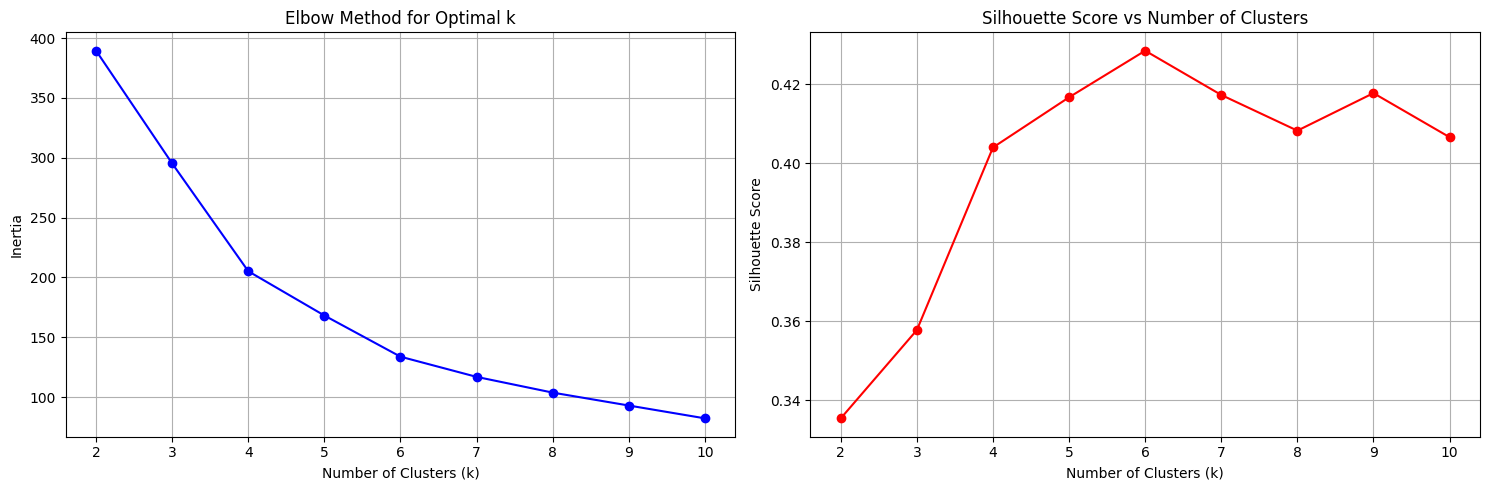

Silhouette scores for different k values:
k=2: 0.335
k=3: 0.358
k=4: 0.404
k=5: 0.417
k=6: 0.428
k=7: 0.417
k=8: 0.408
k=9: 0.418
k=10: 0.407


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method to find optimal number of clusters
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("Silhouette scores for different k values:")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.3f}")

###  Optimal Cluster Selection

**Elbow Method Explanation:**
- **Inertia**: Sum of squared distances to cluster centers
- **Elbow point**: Where adding clusters provides diminishing returns
- **Look for**: Sharp decrease followed by gradual decline

**Silhouette Score Interpretation:**
- **Range**: -1 to +1 (higher is better)
- **Measures**: How similar points are within clusters vs. between clusters
- **Good scores**: Above 0.5 indicates well-separated clusters
- **Decision**: Choose k that balances both metrics

In [19]:
# Apply K-Means with optimal number of clusters (let's use k=5)
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df_clean['Cluster'] = cluster_labels

print(f"K-Means clustering completed with k={optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")
print("\nCluster distribution:")
print(df_clean['Cluster'].value_counts().sort_index())

K-Means clustering completed with k=6
Silhouette Score: 0.428

Cluster distribution:
Cluster
0    45
1    39
2    33
3    39
4    23
5    21
Name: count, dtype: int64


### Final Clustering Results

**Model Performance:**
- **Chosen k=6**: Based on elbow method and silhouette analysis
- **Silhouette Score**: Indicates cluster quality
- **Cluster Balance**: Relatively even distribution across segments
- **Business Value**: Each cluster represents a distinct customer type

## 4. Cluster Visualization and Analysis

Let's visualize the clusters and analyze their characteristics to understand customer segments.

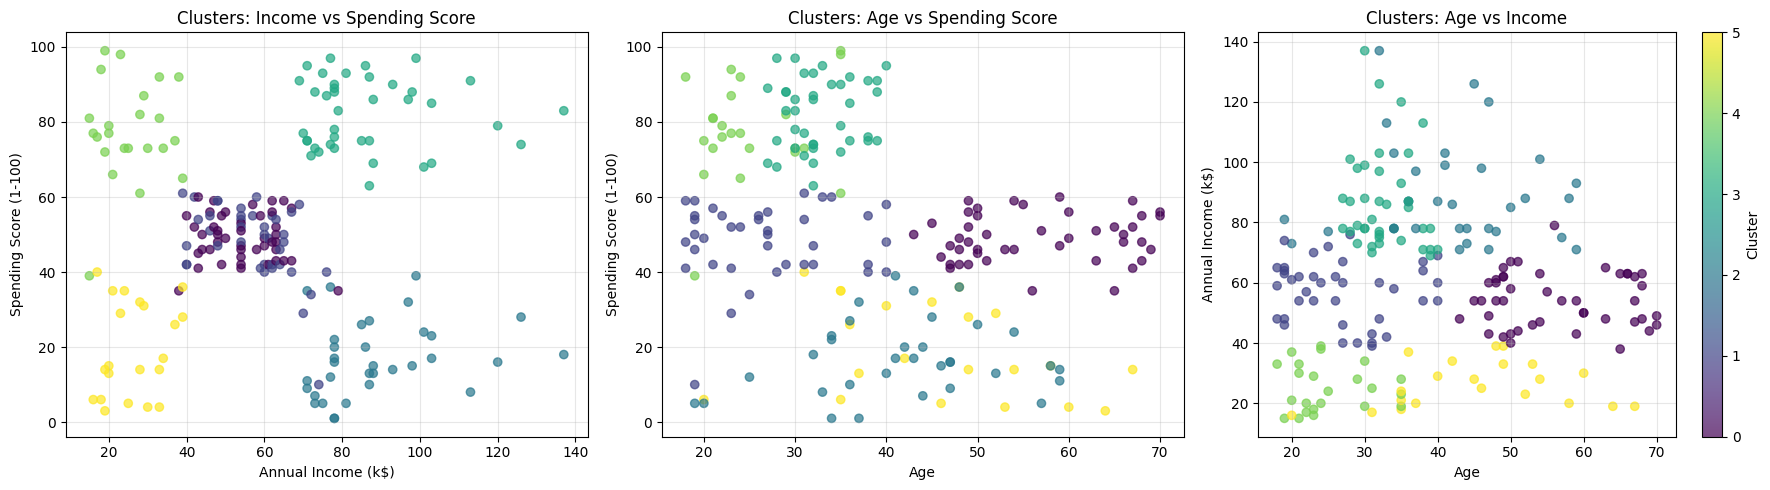

In [20]:
# Visualize clusters in 2D scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Income vs Spending Score
scatter1 = axes[0].scatter(df_clean['Annual Income (k$)'], df_clean['Spending Score (1-100)'], 
                          c=df_clean['Cluster'], cmap='viridis', alpha=0.7)
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].set_title('Clusters: Income vs Spending Score')
axes[0].grid(True, alpha=0.3)

# Age vs Spending Score
scatter2 = axes[1].scatter(df_clean['Age'], df_clean['Spending Score (1-100)'], 
                          c=df_clean['Cluster'], cmap='viridis', alpha=0.7)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].set_title('Clusters: Age vs Spending Score')
axes[1].grid(True, alpha=0.3)

# Age vs Income
scatter3 = axes[2].scatter(df_clean['Age'], df_clean['Annual Income (k$)'], 
                          c=df_clean['Cluster'], cmap='viridis', alpha=0.7)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Annual Income (k$)')
axes[2].set_title('Clusters: Age vs Income')
axes[2].grid(True, alpha=0.3)

# Add colorbar to the far right
plt.colorbar(scatter1, ax=axes[2], label='Cluster')
plt.tight_layout()
plt.show()

###  Cluster Visualization Insights

**How to Read These Plots:**
- **Colors**: Each color represents a different customer segment
- **Patterns**: Look for clear separation between colored groups
- **Overlap**: Minimal overlap indicates good clustering quality

**Key Observations:**
- **Income vs Spending**: Clear 5-cluster pattern emerges
- **Age vs Spending**: Age influences spending behavior differently across segments
- **Age vs Income**: Shows life-stage related income patterns
- **Business Insight**: Visual validation that our clusters make intuitive sense

In [22]:
# Analyze cluster characteristics
cluster_summary = df_clean.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Gender': lambda x: x.mode()[0]  # Most common gender in each cluster
}).round(2)

print("Cluster Characteristics Summary:")
print(cluster_summary)



Cluster Characteristics Summary:
           Age        Annual Income (k$)        Spending Score (1-100)         \
          mean    std               mean    std                   mean    std   
Cluster                                                                         
0        56.33   8.45              54.27   8.98                  49.07   6.30   
1        26.79   7.06              57.10  10.16                  48.13   9.97   
2        41.94  10.18              88.94  16.59                  16.97   9.96   
3        32.69   3.73              86.54  16.31                  82.13   9.36   
4        25.00   5.30              25.26   7.72                  77.61  13.27   
5        45.52  11.77              26.29   7.44                  19.38  12.56   

          Gender  
        <lambda>  
Cluster           
0         Female  
1         Female  
2           Male  
3         Female  
4         Female  
5         Female  


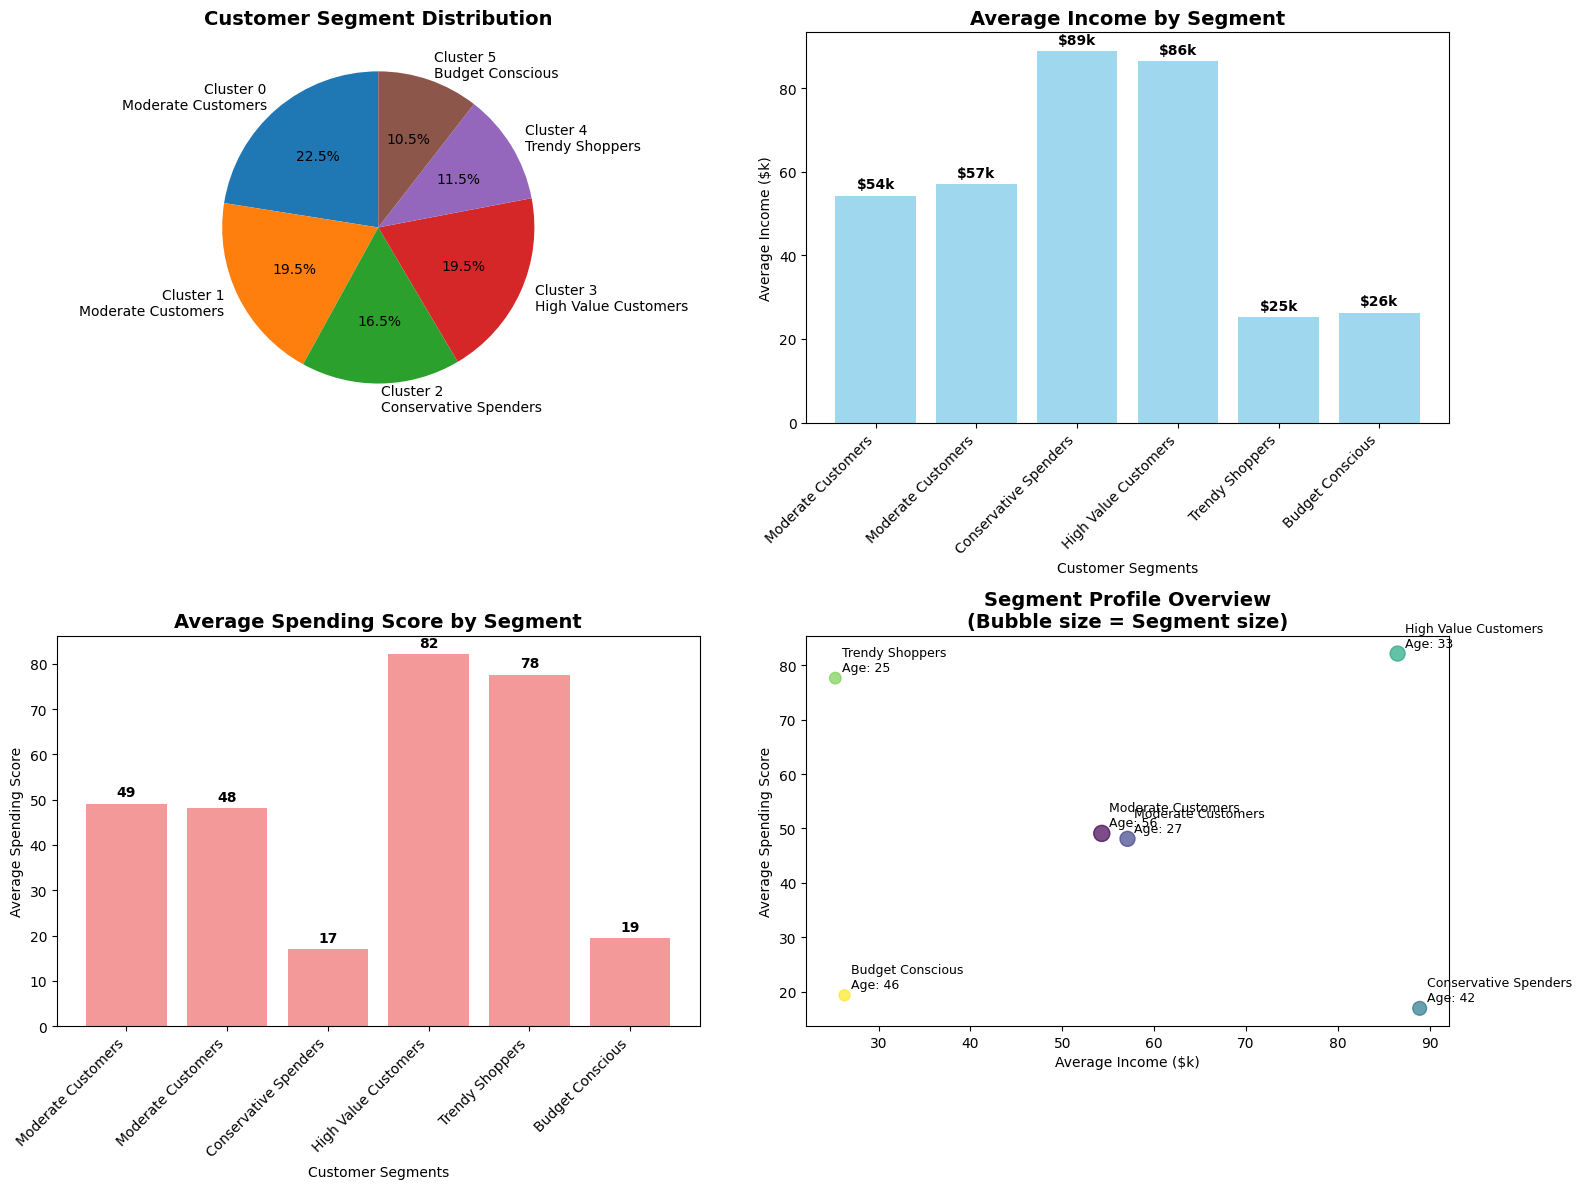


CUSTOMER SEGMENT SUMMARY TABLE
Cluster  Segment Name         Size   %      Avg Age  Avg Income   Avg Spending
--------------------------------------------------------------------------------
0        Moderate Customers   45     22.5  % 56.3     $54         k 49          
1        Moderate Customers   39     19.5  % 26.8     $57         k 48          
2        Conservative Spenders 33     16.5  % 41.9     $89         k 17          
3        High Value Customers 39     19.5  % 32.7     $86         k 82          
4        Trendy Shoppers      23     11.5  % 25.0     $25         k 78          
5        Budget Conscious     21     10.5  % 45.5     $26         k 19          


In [21]:
# Visualize customer segment profiles
profiles = interpret_clusters(df_clean)

# Create visualizations for segment analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Cluster sizes (pie chart)
cluster_sizes = [profiles[i]['size'] for i in sorted(profiles.keys())]
cluster_names = [f"Cluster {i}\n{profiles[i]['segment_name']}" for i in sorted(profiles.keys())]

axes[0,0].pie(cluster_sizes, labels=cluster_names, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Customer Segment Distribution', fontsize=14, fontweight='bold')

# 2. Average Income by cluster (bar chart)
clusters = sorted(profiles.keys())
incomes = [profiles[i]['avg_income'] for i in clusters]
segment_labels = [profiles[i]['segment_name'] for i in clusters]

bars1 = axes[0,1].bar(range(len(clusters)), incomes, color='skyblue', alpha=0.8)
axes[0,1].set_xlabel('Customer Segments')
axes[0,1].set_ylabel('Average Income ($k)')
axes[0,1].set_title('Average Income by Segment', fontsize=14, fontweight='bold')
axes[0,1].set_xticks(range(len(clusters)))
axes[0,1].set_xticklabels(segment_labels, rotation=45, ha='right')

# Add value labels on bars
for bar, income in zip(bars1, incomes):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                   f'${income:.0f}k', ha='center', va='bottom', fontweight='bold')

# 3. Average Spending Score by cluster (bar chart)
spending_scores = [profiles[i]['avg_spending'] for i in clusters]

bars2 = axes[1,0].bar(range(len(clusters)), spending_scores, color='lightcoral', alpha=0.8)
axes[1,0].set_xlabel('Customer Segments')
axes[1,0].set_ylabel('Average Spending Score')
axes[1,0].set_title('Average Spending Score by Segment', fontsize=14, fontweight='bold')
axes[1,0].set_xticks(range(len(clusters)))
axes[1,0].set_xticklabels(segment_labels, rotation=45, ha='right')

# Add value labels on bars
for bar, score in zip(bars2, spending_scores):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                   f'{score:.0f}', ha='center', va='bottom', fontweight='bold')

# 4. Age vs Income vs Spending (bubble chart)
ages = [profiles[i]['avg_age'] for i in clusters]
sizes = [profiles[i]['size'] * 3 for i in clusters]  # Scale bubble size

scatter = axes[1,1].scatter(incomes, spending_scores, s=sizes, alpha=0.7, 
                           c=range(len(clusters)), cmap='viridis')
axes[1,1].set_xlabel('Average Income ($k)')
axes[1,1].set_ylabel('Average Spending Score')
axes[1,1].set_title('Segment Profile Overview\n(Bubble size = Segment size)', fontsize=14, fontweight='bold')

# Add labels for each bubble
for i, (income, spending, age, name) in enumerate(zip(incomes, spending_scores, ages, segment_labels)):
    axes[1,1].annotate(f'{name}\nAge: {age:.0f}', (income, spending), 
                       xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary table
print("\n" + "="*80)
print("CUSTOMER SEGMENT SUMMARY TABLE")
print("="*80)
print(f"{'Cluster':<8} {'Segment Name':<20} {'Size':<6} {'%':<6} {'Avg Age':<8} {'Avg Income':<12} {'Avg Spending':<12}")
print("-"*80)
for cluster in sorted(profiles.keys()):
    profile = profiles[cluster]
    print(f"{cluster:<8} {profile['segment_name']:<20} {profile['size']:<6} {profile['percentage']:<6.1f}% "
          f"{profile['avg_age']:<8.1f} ${profile['avg_income']:<11.0f}k {profile['avg_spending']:<12.0f}")
print("="*80)